### __Natural Language Processing: Machine Learning Models__
> - https://www.kaggle.com/code/figfiglol/disaster-classifying-with-nlp-nltk-tfidf-mlp/notebook
> - https://medium.com/mlearning-ai/a-bow-vs-a-tfidf-feature-extractor-a-practical-application-on-a-na%C3%AFve-bayes-classifier-in-python-a68e8fb2248c

Notes:
> - https://www.kaggle.com/code/xhlulu/disaster-nlp-keras-bert-using-tfhub
> - https://www.kaggle.com/competitions/nlp-getting-started/discussion/298861

In [1]:
# import libraries
import numpy as np
import pandas as pd
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
import random
from collections import Counter
from PIL import Image
import random
import string
from joblib import Parallel, delayed
import math

import warnings
warnings.filterwarnings('ignore')

# import regex
import re

# import nltk
import nltk 
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
#plt.imshow(mpimg.imread('jan_aug_tempanom.png'))

# import seaborn
import seaborn as sns

# import scipy.cluster.hierarchy
import scipy
import scipy.linalg as la
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import whiten, kmeans, vq
from scipy.stats import multivariate_normal
from pathlib import Path

# import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sklearn.model_selection as model_selection
import sklearn.model_selection as cross_validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.naive_bayes import BernoulliNB # Bernoulli because we have binary features
from sklearn.pipeline import Pipeline

# For converting words into frequency counts
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler

#for showing 2D plot
%matplotlib inline    

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### __Import Data__

In [2]:
# import train data
test_df = pd.read_csv('/content/preprocessed2nd_test_data.csv')
test_df.info()
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     3263 non-null   int64 
 1   keyword                3263 non-null   object
 2   location               3263 non-null   object
 3   text                   3263 non-null   object
 4   text_preprocessed      3262 non-null   object
 5   text_preprocessed_2nd  3262 non-null   object
dtypes: int64(1), object(5)
memory usage: 153.1+ KB


,id,keyword,location,text,text_preprocessed,text_preprocessed_2nd
0,0,None,None,Just happened a terrible car crash,happened terrible car crash,happened terrible car crash
1,2,None,None,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...,heard earthquake different city stay safe ever...
2,3,None,None,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...,forest fire spot pond goose fleeing across str...
3,9,None,None,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,apocalypse lighting spokane wildfire
4,11,None,None,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...,...
3258,10861,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastener ...,earthquake safety los angeles safety fastener ...
3259,10865,None,None,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane city others hard...,storm ri worse last hurricane city others hard...
3260,10868,None,None,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago,green line derailment chicago
3261,10874,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo,meg issue hazardous weather outlook hwo


In [3]:
# import train data
train_df = pd.read_csv('/content/preprocessed2nd_train_data.csv')
train_df.info()
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     7613 non-null   int64 
 1   keyword                7613 non-null   object
 2   location               7613 non-null   object
 3   text                   7613 non-null   object
 4   target                 7613 non-null   int64 
 5   text_preprocessed      7611 non-null   object
 6   text_preprocessed_2nd  7611 non-null   object
dtypes: int64(2), object(5)
memory usage: 416.5+ KB


,id,keyword,location,text,target,text_preprocessed,text_preprocessed_2nd
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,deed reason earthquake may allah forgive
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,None,None,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,resident asked shelter place notified officer ...
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,people receive wildfire evacuation order calif...
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...,...
7608,10869,None,None,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...,two giant crane holding bridge collapse nearby...
7609,10870,None,None,@aria_ahrary @TheTawniest The out of control w...,1,control wild fire california even northern par...,control wild fire california even northern par...
7610,10871,None,None,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,utc km volcano hawaii,utc km volcano hawaii
7611,10872,None,None,Police investigating after an e-bike collided ...,1,police investigating e bike collided car littl...,police investigating e bike collided car littl...


In [4]:
# check for missing data - train_df
train_df.isnull().sum()

id                       0
keyword                  0
location                 0
text                     0
target                   0
text_preprocessed        2
text_preprocessed_2nd    2
dtype: int64

In [5]:
# check for missing data - test_df
test_df.isnull().sum()

id                       0
keyword                  0
location                 0
text                     0
text_preprocessed        1
text_preprocessed_2nd    1
dtype: int64

In [6]:
train_df[train_df['text_preprocessed'].isnull() == True]

,id,keyword,location,text,target,text_preprocessed,text_preprocessed_2nd
4497,6394,hurricane,NAWF SIDE POKING OUT,@Hurricane_Dame ???????? I don't have them the...,1,NaN,NaN
6766,9697,tornado,None,@Ayshun_Tornado then don't,0,NaN,NaN


In [7]:
test_df[test_df['text_preprocessed'].isnull() == True]

,id,keyword,location,text,text_preprocessed,text_preprocessed_2nd
13,43,None,None,What if?!,NaN,NaN


In [8]:
# drop rows with missing values - train_df
train_df.dropna(inplace=True)
train_df.isnull().sum()
train_df

id                       0
keyword                  0
location                 0
text                     0
target                   0
text_preprocessed        0
text_preprocessed_2nd    0
dtype: int64

,id,keyword,location,text,target,text_preprocessed,text_preprocessed_2nd
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,deed reason earthquake may allah forgive
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,None,None,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,resident asked shelter place notified officer ...
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,people receive wildfire evacuation order calif...
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...,...
7608,10869,None,None,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...,two giant crane holding bridge collapse nearby...
7609,10870,None,None,@aria_ahrary @TheTawniest The out of control w...,1,control wild fire california even northern par...,control wild fire california even northern par...
7610,10871,None,None,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,utc km volcano hawaii,utc km volcano hawaii
7611,10872,None,None,Police investigating after an e-bike collided ...,1,police investigating e bike collided car littl...,police investigating e bike collided car littl...


In [9]:
# fill 'NA'value with "None" - test_df
# as the number of rows should match with the submission file 
test_df['text_preprocessed'] = test_df['text_preprocessed'].fillna("None")
test_df['text_preprocessed_2nd'] = test_df['text_preprocessed_2nd'].fillna("None")
test_df.isnull().sum()
test_df

id                       0
keyword                  0
location                 0
text                     0
text_preprocessed        0
text_preprocessed_2nd    0
dtype: int64

,id,keyword,location,text,text_preprocessed,text_preprocessed_2nd
0,0,None,None,Just happened a terrible car crash,happened terrible car crash,happened terrible car crash
1,2,None,None,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...,heard earthquake different city stay safe ever...
2,3,None,None,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...,forest fire spot pond goose fleeing across str...
3,9,None,None,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,apocalypse lighting spokane wildfire
4,11,None,None,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,typhoon soudelor kill china taiwan
...,...,...,...,...,...,...
3258,10861,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastener ...,earthquake safety los angeles safety fastener ...
3259,10865,None,None,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane city others hard...,storm ri worse last hurricane city others hard...
3260,10868,None,None,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago,green line derailment chicago
3261,10874,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo,meg issue hazardous weather outlook hwo


#### __Quick Look at data__

In [10]:
train_df[train_df['target'] == 0]['text_preprocessed_2nd'].values[1]

'love fruit'

In [11]:
train_df[train_df['target'] == 1]['text_preprocessed_2nd'].values[1]

'forest fire near la ronge sask canada'

#### __Building TFIDF Vectors__

In [15]:
# start time to measure the time of the program execution
start_time = time.time()

# Define the vectorizer and specify the arguments
tfidf_vect = TfidfVectorizer(ngram_range=(1, 2), max_features=1200) 

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.00010561943054199219 seconds ---


In [16]:
# start time to measure the time of the program execution
start_time = time.time()

X = tfidf_vect.fit_transform(train_df['text_preprocessed_2nd'])
target = pd.DataFrame(X.toarray(), columns=tfidf_vect.get_feature_names())

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.29098081588745117 seconds ---


#### __Dimensionality Reduction: PCA__

array([[-2.04921929e-02, -2.50826637e-02, -4.25906529e-03, ...,
        -1.73451435e-18,  3.27301726e-19,  1.35457059e-19],
       [ 4.05157236e-01, -5.21431775e-02, -7.25766013e-02, ...,
         3.53740317e-19, -1.72161346e-19, -6.65080894e-21],
       [-3.11322746e-03, -1.94293464e-02,  7.19609970e-03, ...,
         5.47662075e-19, -9.96366679e-19, -6.03561114e-19],
       ...,
       [-9.14933367e-03, -3.52910234e-02,  7.93231701e-03, ...,
         1.73858035e-20, -2.69212902e-20, -5.81537952e-20],
       [-1.72278398e-02, -1.08157282e-02,  4.72602054e-02, ...,
         2.08517063e-19,  5.16542694e-19,  6.32843898e-22],
       [ 1.02357729e-01, -1.97420376e-01,  7.47622174e-02, ...,
        -1.66440387e-19, -5.87627916e-20, -9.96455566e-21]])

array([[ 7.61395160e-03,  8.58862875e-03,  6.82719527e-03, ...,
        -7.04750956e-03, -4.97116089e-03, -6.93984674e-03],
       [-2.59938293e-02, -2.36299805e-02, -2.77825565e-03, ...,
        -7.28601009e-03, -7.16244740e-03,  3.13061330e-02],
       [ 1.10265770e-02,  9.95784584e-03,  4.42021416e-03, ...,
         1.39870042e-02,  1.36054372e-02, -1.33800731e-02],
       ...,
       [-0.00000000e+00, -5.88718506e-19, -2.43721331e-17, ...,
        -1.29426634e-17,  6.62718578e-17,  2.64274280e-17],
       [ 0.00000000e+00,  4.53162627e-18,  4.62525618e-17, ...,
        -3.89804562e-17, -3.19026489e-17, -8.15523322e-18],
       [ 0.00000000e+00,  6.46180260e-18,  7.25508292e-17, ...,
         9.80525340e-17, -3.38817838e-16,  7.30057697e-17]])

array([6.79709556e-03, 5.27894270e-03, 4.78565148e-03, ...,
       1.38237994e-36, 1.02729104e-36, 4.64122039e-38])

array([6.87473260e-03, 5.33923926e-03, 4.84031362e-03, ...,
       1.39816961e-36, 1.03902485e-36, 4.69423283e-38])

,explained_variance,pca_component,pca_100%
0,6.874733e-03,1,6.874733e-01
1,5.339239e-03,2,5.339239e-01
2,4.840314e-03,3,4.840314e-01
3,4.774374e-03,4,4.774374e-01
4,4.596527e-03,5,4.596527e-01
...,...,...,...
1195,6.827159e-36,1196,6.827159e-34
1196,3.230210e-36,1197,3.230210e-34
1197,1.398170e-36,1198,1.398170e-34
1198,1.039025e-36,1199,1.039025e-34




--- 1.6040966510772705 seconds ---


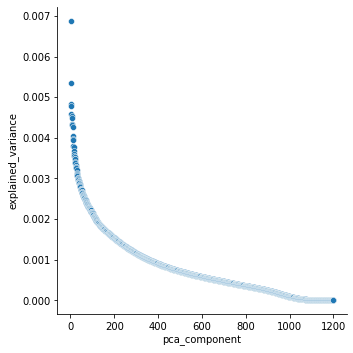

In [18]:
# start time to measure the time of the program execution
start_time = time.time()

pca = PCA()
pca_data = pca.fit_transform(target)
pca_data

print('\n')
pca.components_
print('\n')
pca.explained_variance_
print('\n')
pca.explained_variance_ratio_
print('\n')
pca_variance_df = pd.DataFrame(pca.explained_variance_ratio_, columns=['explained_variance'])
pca_variance_df['pca_component'] = [i + 1 for i in range(1200)]
pca_variance_df['pca_100%'] = pca_variance_df['explained_variance']*100
pca_variance_df

sns.relplot(data=pca_variance_df, x='pca_component', y ='explained_variance')

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### __Train / Test Split__

In [19]:
y = train_df['target']

In [20]:
x_train, x_val, y_train, y_val= train_test_split(target, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [21]:
print(x_train.shape)
print(x_val.shape)

(6088, 1200)
(1523, 1200)


#### __Model Training: MLPClassifier__

In [35]:
# start time to measure the time of the program execution
start_time = time.time()

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

mlp=MLPClassifier(random_state=0, early_stopping=True, verbose=2)
pipeline_mlp = Pipeline(steps=[('pca', PCA(n_components=150)),
                           ('model', mlp)])
pipeline_mlp.fit(x_train, y_train)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Iteration 1, loss = 0.69175051
Validation score: 0.663383
Iteration 2, loss = 0.66065851
Validation score: 0.632184
Iteration 3, loss = 0.63462637
Validation score: 0.697865
Iteration 4, loss = 0.60268756
Validation score: 0.742200
Iteration 5, loss = 0.56527167
Validation score: 0.756979
Iteration 6, loss = 0.53063789
Validation score: 0.753695
Iteration 7, loss = 0.50434411
Validation score: 0.756979
Iteration 8, loss = 0.48852395
Validation score: 0.756979
Iteration 9, loss = 0.47849426
Validation score: 0.763547
Iteration 10, loss = 0.47259347
Validation score: 0.763547
Iteration 11, loss = 0.46775060
Validation score: 0.763547
Iteration 12, loss = 0.46463107
Validation score: 0.756979
Iteration 13, loss = 0.46147622
Validation score: 0.761905
Iteration 14, loss = 0.45944360
Validation score: 0.761905
Iteration 15, loss = 0.45736696
Validation score: 0.768473
Iteration 16, loss = 0.45469456
Validation score: 0.765189
Iteration 17, loss = 0.45263346
Validation score: 0.765189
Iterat

Pipeline(steps=[('pca', PCA(n_components=150)),
                ('model',
                 MLPClassifier(early_stopping=True, random_state=0,
                               verbose=2))])



--- 6.94599986076355 seconds ---


MLP Accuracy: 0.7905449770190414
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       869
           1       0.79      0.70      0.74       654

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



Text(0.5, 15.0, 'Predicted Values')

Text(33.0, 0.5, 'Actual Values')

Text(0.5, 1.0, 'MLP Confusion Matrix')

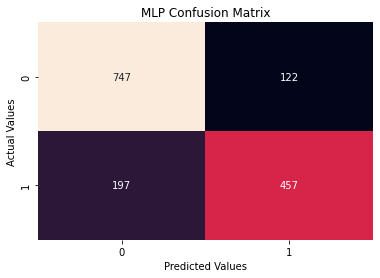



--- 0.1547684669494629 seconds ---


In [36]:
# start time to measure the time of the program execution
start_time = time.time()

y_pred_mlp=pipeline_mlp.predict(x_val)
cm_mlp = confusion_matrix(y_val, y_pred_mlp)
print('MLP Accuracy:', accuracy_score(y_val, y_pred_mlp))
print(classification_report(y_val, y_pred_mlp))
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### Preparing Test Data - TFIDF Vectorize

In [37]:
# start time to measure the time of the program execution
start_time = time.time()

X1 = tfidf_vect.transform(test_df['text_preprocessed_2nd'])
X1 = pd.DataFrame(X1.toarray(), columns=tfidf_vect.get_feature_names())

submission = pd.read_csv('/content/sample_submission.csv')
submission['target'] = pipeline_mlp.predict(X1)
submission.to_csv('trial10_submission_pipeline_mlp.csv', index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.12773942947387695 seconds ---


### __Hyperparameter Tuning - MLPClassifier__
  * https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa

In [23]:
# start time to measure the time of the program execution
start_time = time.time()

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

mlp2=MLPClassifier(random_state=0, early_stopping=True, max_iter=100, verbose=2)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.00012731552124023438 seconds ---


In [24]:
# start time to measure the time of the program execution
start_time = time.time()

# Define a hyper-parameter space to search. (All the values that you want to try out.)

param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Run Grid Search
clf_mlp = GridSearchCV(mlp2, param_grid, n_jobs=-1, cv=3)
clf_mlp.fit(x_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf_mlp.best_params_)

# All results
means = clf_mlp.cv_results_['mean_test_score']
stds = clf_mlp.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_mlp.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Iteration 1, loss = 0.69076918
Validation score: 0.632184
Iteration 2, loss = 0.63101448
Validation score: 0.740558
Iteration 3, loss = 0.55670557
Validation score: 0.798030
Iteration 4, loss = 0.49176759
Validation score: 0.802956
Iteration 5, loss = 0.45397362
Validation score: 0.802956
Iteration 6, loss = 0.43302802
Validation score: 0.806240
Iteration 7, loss = 0.41997298
Validation score: 0.801314
Iteration 8, loss = 0.41103043
Validation score: 0.809524
Iteration 9, loss = 0.40465028
Validation score: 0.799672
Iteration 10, loss = 0.39781942
Validation score: 0.802956
Iteration 11, loss = 0.39327049
Validation score: 0.807882
Iteration 12, loss = 0.38943770
Validation score: 0.802956
Iteration 13, loss = 0.38599096
Validation score: 0.799672
Iteration 14, loss = 0.38264268
Validation score: 0.799672
Iteration 15, loss = 0.38000120
Validation score: 0.798030
Iteration 16, loss = 0.37729768
Validation score: 0.798030
Iteration 17, loss = 0.37503269
Validation score: 0.799672
Iterat

GridSearchCV(cv=3,
             estimator=MLPClassifier(early_stopping=True, max_iter=100,
                                     random_state=0, verbose=2),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.570 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.766 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.570 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.766 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.569 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.774 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'

MLP Accuracy: 0.7971109652002626
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       869
           1       0.78      0.74      0.76       654

    accuracy                           0.80      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



Text(0.5, 15.0, 'Predicted Values')

Text(33.0, 0.5, 'Actual Values')

Text(0.5, 1.0, 'MLP Confusion Matrix')

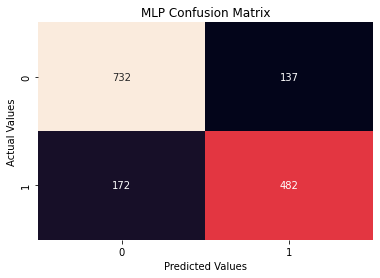



--- 0.15377092361450195 seconds ---


In [25]:
# start time to measure the time of the program execution
start_time = time.time()

y_pred_clfmlp=clf_mlp.predict(x_val)
cm_mlp = confusion_matrix(y_val, y_pred_clfmlp)
print('MLP Accuracy:', accuracy_score(y_val, y_pred_clfmlp))
print(classification_report(y_val, y_pred_clfmlp))
sns.heatmap(cm_mlp, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('MLP Confusion Matrix')
plt.show()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### Prepare Submission File with test_df

In [27]:
# start time to measure the time of the program execution
start_time = time.time()

X2 = tfidf_vect.transform(test_df['text_preprocessed_2nd'])
X2 = pd.DataFrame(X2.toarray(), columns=tfidf_vect.get_feature_names())

submission = pd.read_csv('/content/sample_submission.csv')
submission['target'] = clf_mlp.predict(X2)
submission.to_csv('trial9_submission_clf_mlp.csv', index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 0.11856961250305176 seconds ---


#### __Model Training: Logistic Regression__

In [41]:
scaler = MinMaxScaler()
lr = LogisticRegression(solver='liblinear', random_state=777)
pipeline_lr = Pipeline(steps=[('scale', scaler),
                              ('pca', PCA(n_components=200)),
                           ('model', lr)])
pipeline_lr.fit(x_train, y_train)

y_pred_lr = pipeline_lr.predict(x_val)

Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=200)),
                ('model',
                 LogisticRegression(random_state=777, solver='liblinear'))])

In [42]:
print ('Training f-1 score: %.4f' % f1_score(y_train, pipeline_lr.predict(x_train)))

Training f-1 score: 0.7248


lr Accuracy: 0.7826657912015759
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       869
           1       0.80      0.66      0.72       654

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



Text(0.5, 15.0, 'Predicted Values')

Text(33.0, 0.5, 'Actual Values')

Text(0.5, 1.0, 'lr Confusion Matrix')

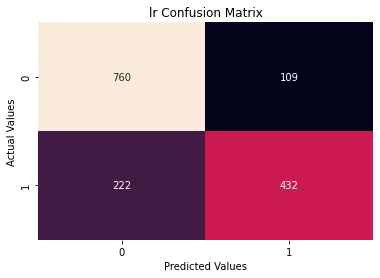

In [43]:
cm_lr = confusion_matrix(y_val, y_pred_lr)
print('lr Accuracy:', accuracy_score(y_val, y_pred_lr))
print(classification_report(y_val, y_pred_lr))
sns.heatmap(cm_lr, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('lr Confusion Matrix')
plt.show()

#### __Model__
> - Ridge Classifier
> - Logistic Regression
> - Gausian NB
> - SGD Calssifier
> - KNN
> - SVC Classifier
> - Decision Tree
> - Random Forest
> - XGBoost
> - Gradient Boopsting Classifer

In [44]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
## Train classification models
clf_ridge = RidgeClassifier()
clf_lg = LogisticRegression()
clf_nb = GaussianNB()
clf_sgd = SGDClassifier()
clf_knn = KNeighborsClassifier()
clf_svc = SVC()
clf_dt = DecisionTreeClassifier()
clf_rf = RandomForestClassifier()
clf_xgb = XGBClassifier()

# make a list of the above models
classification_models = [clf_ridge, clf_lg, clf_nb, clf_sgd,
                         clf_knn, clf_svc, clf_dt, clf_rf, clf_xgb]
classification_models

[RidgeClassifier(),
 LogisticRegression(),
 GaussianNB(),
 SGDClassifier(),
 KNeighborsClassifier(),
 SVC(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 XGBClassifier()]

In [46]:
# scores = model_selection.cross_val_score(model, train_vectors, train_df['target'], cv=5, scoring='f1')

# functions to run all models being trained
def run_model(model, target, y):
    scores = model_selection.cross_val_score(model, target, y, cv=5, scoring='f1')
    
    return scores

def run_mean_model(model, target, y):
    scores = model_selection.cross_val_score(model, target, y, cv=5, scoring='f1')
    
    return np.mean(scores)

# function for summarizing model performance
def summary_ml(models_lst, target, y):

    # set up empty lists for arrays of scores for models
    ridge = []
    lg = []
    nb = []
    sgd = []
    knn = []
    svc = []
    dt = []
    rf = []
    xgb = []
    
    models_result = [ridge, lg, nb, sgd, knn, svc, dt, rf, xgb]
    
    for model in range(len(models_lst)):
        scores = run_model(models_lst[model], target, y)
        models_result[model].append(scores)
    
        
    dict_model = {'ridge': ridge, 'logisticReg': lg, 'gausian nb': nb,
                  'sgd': sgd, 'knn': knn, 'svc': svc, 'decision tree': dt,
                  'random forest': rf, 'xgb': xgb}
    
    # set up empty lists for mean scores for models
    ridge_m = []
    lg_m = []
    nb_m = []
    sgd_m = []
    knn_m = []
    svc_m = []
    dt_m = []
    rf_m = []
    xgb_m = []

    models_result_mean = [ridge_m, lg_m, nb_m, sgd_m, knn_m, svc_m, dt_m, rf_m, xgb_m]
    
    for model in range(len(models_lst)):
        scores_mean = run_mean_model(models_lst[model], target, y)
        models_result_mean[model].append(scores_mean)
    
    dict_mean_model = {'ridge': ridge_m, 'logisticReg': lg_m, 'gausian nb': nb_m,
                  'sgd': sgd_m, 'knn': knn_m, 'svc': svc_m, 'decision tree': dt_m,
                  'random forest': rf_m, 'xgb': xgb_m}
    
    result_df = pd.DataFrame(dict_model)
    result_sum_df = pd.DataFrame(dict_mean_model)
    
    return result_df, result_sum_df    
    

In [47]:
# start time to measure the time of the program execution
start_time = time.time()

# print out the results of the model performance summaries
result_array, summary_mean_result = summary_ml(classification_models, target, y)
result_array
summary_mean_result

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,ridge,logisticReg,gausian nb,sgd,knn,svc,decision tree,random forest,xgb
0,"[0.5785920925747348, 0.4979389942291838, 0.591...","[0.5831702544031311, 0.5311203319502075, 0.591...","[0.4942965779467681, 0.4533120510774142, 0.525...","[0.6283662477558348, 0.5100240577385726, 0.566...","[0.17302798982188294, 0.17683686176836863, 0.1...","[0.5513733468972533, 0.49914236706689546, 0.56...","[0.5541125541125541, 0.4865744507729862, 0.535...","[0.5695970695970696, 0.4708818635607321, 0.567...","[0.4159999999999999, 0.31081081081081086, 0.40..."


,ridge,logisticReg,gausian nb,sgd,knn,svc,decision tree,random forest,xgb
0,0.572775,0.575447,0.534816,0.565473,0.172083,0.557659,0.521776,0.555559,0.376896




--- 647.4319653511047 seconds ---


In [48]:
## Train classification models
clf_gb = GradientBoostingClassifier()

# functions to run all models being trained
run_model(clf_gb, target, y)
run_mean_model(clf_gb, target, y)

array([0.44893378, 0.29685807, 0.40545809, 0.31014823, 0.48979592])

0.39634771777209593

### __Hyperparameter Tuning - SVC__
> - https://stackoverflow.com/questions/57513586/how-to-use-grid-search-for-the-svm
> - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
> - https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
> - https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec


In [63]:
# scale & PCA on data
scaler = MinMaxScaler()
df_scale = pd.DataFrame(scaler.fit_transform(target), columns = target.columns.tolist())
pca2 = PCA(n_components=200)
target_adj = pca2.fit_transform(df_scale)
target_adj

array([[-0.01087415, -0.01154028, -0.01155151, ...,  0.01875648,
        -0.01495164,  0.06343301],
       [-0.01322763, -0.01313046, -0.01243668, ..., -0.04236836,
         0.00357987,  0.00395569],
       [-0.00968524, -0.01023942, -0.00894535, ...,  0.00559142,
         0.05324995,  0.03430593],
       ...,
       [-0.0094675 , -0.00976577, -0.00822258, ..., -0.03785949,
         0.0047412 ,  0.03443392],
       [-0.01156658, -0.01290765, -0.01337102, ..., -0.02920349,
         0.06942503,  0.0070805 ],
       [-0.03149082, -0.03848169,  0.11656157, ..., -0.00835802,
        -0.00578511,  0.02642241]])

In [64]:
# start time to measure the time of the program execution
start_time = time.time()
 
# defining parameter range
param_grid = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf'],
             'max_iter': [-1],
             'random_state': [10, 25, 35, 42, 53]}

clf_svc = SVC()
 
grid_svc = GridSearchCV(clf_svc, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid_svc.fit(target_adj, y)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=10;, score=0.571 total time=   4.2s
[CV 2/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=10;, score=0.570 total time=   4.1s
[CV 3/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=10;, score=0.570 total time=   4.1s
[CV 4/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=10;, score=0.570 total time=   4.2s
[CV 5/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=10;, score=0.570 total time=   4.1s
[CV 1/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=25;, score=0.571 total time=   4.2s
[CV 2/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=25;, score=0.570 total time=   4.0s
[CV 3/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=25;, score=0.570 total time=   4.2s
[CV 4/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf'], 'max_iter': [-1],
                         'random_state': [10, 25, 35, 42, 53]},
             verbose=3)



--- 8375.69797706604 seconds ---


In [65]:
# start time to measure the time of the program execution
start_time = time.time()

# print best parameter after tuning
print(grid_svc.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

{'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'random_state': 10}
SVC(C=100.0, gamma=0.01, random_state=10)


--- 0.0008885860443115234 seconds ---


#### [CV 5/5] END C=1, gamma=0.1, kernel=rbf, max_iter=-1, random_state=10;, score=0.780 total time=  11.4s

#### Preparing Submission File with test_df

In [66]:
# start time to measure the time of the program execution
start_time = time.time()

X4 = tfidf_vect.transform(test_df['text_preprocessed_2nd'])
X4 = pd.DataFrame(X4.toarray(), columns=tfidf_vect.get_feature_names())

# scale & PCA on data
scaler = MinMaxScaler()
test_scale = pd.DataFrame(scaler.fit_transform(X4), columns = X4.columns.tolist())
pca2 = PCA(n_components=200)
X4_adj = pca2.fit_transform(test_scale)

submission = pd.read_csv('/content/sample_submission.csv')
submission['target'] = grid_svc.predict(X4_adj)
submission.to_csv('trial12_submission_tfidf_pcagrid_svc.csv', index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 4.058852434158325 seconds ---


### __Hyperparameter Tuning - SVC without Scaler & PCA__

In [ ]:
# start time to measure the time of the program execution
start_time = time.time()
 
# defining parameter range
param_grid = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf'],
             'max_iter': [-1],
             'random_state': [10, 25, 35, 42, 53]}

clf_svc = SVC()
 
grid_svc2 = GridSearchCV(clf_svc, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid_svc2.fit(target, y)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=10;, score=0.571 total time=  32.7s
[CV 2/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=10;, score=0.570 total time=  33.0s
[CV 3/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=10;, score=0.570 total time=  32.7s
[CV 4/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=10;, score=0.570 total time=  32.6s
[CV 5/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=10;, score=0.570 total time=  32.9s
[CV 1/5] END C=1e-05, gamma=1, kernel=linear, max_iter=-1, random_state=25;, score=0.571 total time=  33.6s


In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

# print best parameter after tuning
print(grid_svc2.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_svc2.best_estimator_)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

X4 = tfidf_vect.transform(test_df['text_preprocessed_2nd'])
X4 = pd.DataFrame(X4.toarray(), columns=tfidf_vect.get_feature_names())

submission = pd.read_csv('/content/sample_submission.csv')
submission['target'] = grid_svc2.predict(X4)
submission.to_csv('trial13_submission_tfidf_grid_svc.csv', index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

### __Hyperparameter Tuning - Logistic Regression__
> - https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
> - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [53]:
target.columns.tolist()

['abc',
 'abc news',
 'ablaze',
 'accident',
 'account',
 'across',
 'act',
 'action',
 'actually',
 'added',
 'affected',
 'affected fatal',
 'aftershock',
 'ago',
 'ahead',
 'air',
 'air ambulance',
 'aircraft',
 'aircraft debris',
 'airplane',
 'airport',
 'airport get',
 'alarm',
 'album',
 'almost',
 'alone',
 'already',
 'also',
 'always',
 'ambulance',
 'ambulance helicopter',
 'america',
 'american',
 'amid',
 'ancient',
 'angry',
 'animal',
 'annihilated',
 'annihilation',
 'anniversary',
 'another',
 'answer',
 'anthrax',
 'anthrax lab',
 'anyone',
 'anything',
 'apocalypse',
 'apollo',
 'appears',
 'appears blast',
 'area',
 'armageddon',
 'army',
 'army trench',
 'around',
 'arrested',
 'arson',
 'arsonist',
 'art',
 'article',
 'as',
 'ash',
 'atomic',
 'atomic bomb',
 'atomic bombing',
 'attack',
 'attacked',
 'attacked muslim',
 'aug',
 'august',
 'august pm',
 'australia',
 'avalanche',
 'ave',
 'away',
 'awesome',
 'baby',
 'back',
 'bad',
 'bag',
 'bagging',
 'ball',


In [55]:
# scale & PCA on data
scaler = MinMaxScaler()
df_scale = pd.DataFrame(scaler.fit_transform(target), columns = target.columns.tolist())
pca2 = PCA(n_components=200)
target_adj = pca2.fit_transform(df_scale)
target_adj

array([[-0.01088094, -0.01154948, -0.01154849, ...,  0.05756823,
        -0.09477435, -0.05057464],
       [-0.01322828, -0.01313471, -0.01243136, ..., -0.08893751,
        -0.09239776, -0.0294863 ],
       [-0.00968508, -0.01023976, -0.00894478, ..., -0.01945047,
         0.00418526,  0.08617843],
       ...,
       [-0.00946736, -0.00976675, -0.00822372, ...,  0.00595471,
         0.0377645 ,  0.00844716],
       [-0.01157065, -0.01291189, -0.01338282, ..., -0.01668429,
         0.05446637,  0.00739498],
       [-0.03149205, -0.03848325,  0.1165682 , ..., -0.02838603,
         0.01492892, -0.01189992]])

In [57]:
# start time to measure the time of the program execution
start_time = time.time()

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold

# defining parameter range
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty': ['l2'],
             'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2],
             'random_state': [10, 25, 35, 42, 53]}

clf_lg = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

grid_lg = GridSearchCV(clf_lg, param_grid, n_jobs=-1, 
                       scoring='f1', cv=cv, verbose = 3)
    
# fitting the model for grid search
grid_lg.fit(target_adj, y)

# print best parameter after tuning
print(grid_lg.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_lg.best_estimator_)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

Fitting 30 folds for each of 150 candidates, totalling 4500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
                         'penalty': ['l2'],
                         'random_state': [10, 25, 35, 42, 53],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1', verbose=3)

{'C': 100.0, 'penalty': 'l2', 'random_state': 35, 'solver': 'saga'}
LogisticRegression(C=100.0, random_state=35, solver='saga')


--- 138.36490440368652 seconds ---


In [60]:
# start time to measure the time of the program execution
start_time = time.time()

# set up LG model with the best paramter from grid search above
clf_lg2 = LogisticRegression(C=100, penalty='l2', 
                            random_state=35, solver='saga')

# check the trained scores
run_model(clf_lg2, target_adj, y)
print('\n')
run_mean_model(clf_lg2, target_adj, y)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

array([0.60934579, 0.56423611, 0.58668858, 0.56603774, 0.74098361])

0.613458365276344



--- 17.75343894958496 seconds ---


#### Preparing Submission File with test_df

In [62]:
# start time to measure the time of the program execution
start_time = time.time()

X4 = tfidf_vect.transform(test_df['text_preprocessed_2nd'])
X4 = pd.DataFrame(X4.toarray(), columns=tfidf_vect.get_feature_names())

# scale & PCA on data
scaler = MinMaxScaler()
test_scale = pd.DataFrame(scaler.fit_transform(X4), columns = X4.columns.tolist())
pca2 = PCA(n_components=200)
X4_adj = pca2.fit_transform(test_scale)

submission = pd.read_csv('/content/sample_submission.csv')
submission['target'] = grid_lg.predict(X4_adj)
submission.to_csv('trial11_submission_tfidf_pcagrid_lg.csv', index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")



--- 1.95875883102417 seconds ---


### __Hyperparameter Tuning: Logistic Regression without Scaler & PCA__

In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold

# defining parameter range
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty': ['l2'],
             'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2],
             'random_state': [10, 25, 35, 42, 53]}

clf_lg = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

grid_lg2 = GridSearchCV(clf_lg, param_grid, n_jobs=-1, 
                       scoring='f1', cv=cv, verbose = 3)
    
# fitting the model for grid search
grid_lg2.fit(target, y)

# print best parameter after tuning
print(grid_lg2.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid_lg2.best_estimator_)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

# set up LG model with the best paramter from grid search above
clf_lg3 = LogisticRegression(C=100, penalty='l2', 
                            random_state=35, solver='saga')

# check the trained scores
run_model(clf_lg3, target, y)
print('\n')
run_mean_model(clf_lg3, target, y)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### Preparing Submission File with test_df

In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

X4 = tfidf_vect.transform(test_df['text_preprocessed_2nd'])
X4 = pd.DataFrame(X4.toarray(), columns=tfidf_vect.get_feature_names())

submission = pd.read_csv('/content/sample_submission.csv')
submission['target'] = grid_lg2.predict(X4)
submission.to_csv('trial14_submission_tfidf_grid_lg.csv', index=False)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")